분류의 성능 평가 지표
 1. 정확도(Accuracy)
 2. 오차행렬(Confusion Matrix)
 3. 정밀도(Precision)
 4. 재현율(Recall)
 5. F1 스코어
 6. ROC AUC

# 01 정확도(Accuracy)

## 정확도(Accuracy) = $예측 결과가 동일한 데이터 건수\over 전체 예측 데이터 건수$

정확도 : 직관적을 모델 예측 성능을 나타내는 평가 지표

In [3]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    
    #predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [4]:
from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 MyDummyClassifier로 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 될 수 없다.

예 ) 100개의 데이터 = 90개 데이터 레이블(=0) + 10개 데이터 레이블(=1) 
 -> 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도 90%
 
 MNIST 데이터 세트( load_digits() ) : 0~9까지의 숫자 이미지 픽셀 정보를 가지고 있다. 이를 기반으로 숫자 Digit를 예측하는 데 사용한다.
 -> 이를 이용해 레이블 값이 7 / Not 7로 변환해 이진 분류 문제로 살짝 바꿔보겠다. 
    즉 전체 데이터 10% = True, 나머지 90% = False인 불균형 데이터 세트

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool)
    
#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

#digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환, 7이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data,y, random_state = 11)

In [7]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0 과 1 의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 {0:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0 과 1 의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 0.900


불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고 MyFakeClassifier를 이용해 예측/평가 수행
- predic()의 결과를 np.zeros()로 모두 0 값으로 반홤함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%.
- 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용 X
- 이러한 한계점 극복을 위해 여러 가지 분류 지표와 함께 적용해야함.

# 02 오차행렬

오차행렬(confusion matrix, 혼동행렬)은 학습된 분류 모델이 예측을 수행하면서 얾나 헷갈리고 있는지 함께 보여주는 지표이다.
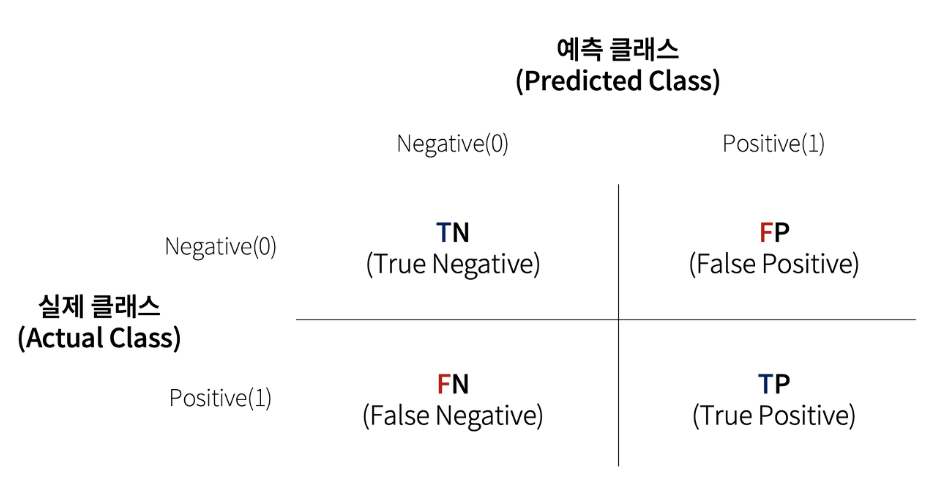
- TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0 
- FP : 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0 
- FN : 예측값을 Negative값 0으로 예측했는데 실제 값은 Positive 값 1
- TP : 예측값을 Positive값 1로 예측했는데 실제 값 역시 Positive 값 1

정확도 예제에서 다룬 MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현하자면, 

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracu), 정밀도(Precision), 재현율(Recall)값을 알 수 있다.
정확도는 오차 행렬상에서 다음과 같이 재정의할 수 있다.  
- 정확도 = $예측 결과와 실제 값이 동일한 건수\over 전체 데이터 수$ = $(TN + TP)\over (TN + FP + FN + TP)$

ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생한다.


# 정밀도와 재현율  
정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표다.
### 정밀도 : $TP\over (FP + TP)$  
예측을 Positive로 한 대상 중, 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.  


### 재현율 : $TP\over (FN + TP)$  
실제 값이 Positive인 대상 중, 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.    
  
  
 ### -정밀도가 재현율보다 더 중요한 이유 : 
 스팸메일 여부를 판단하는 모델의 경우, 스펨 메일을(Positive)를 일반메일(Negative)로 분류하여도 손실은 크게 없다. (FN의 경우에 해당) 하지만, 일반 메일(Negatove)을 스펨메일(Positive)로 분류하여(FP의 경우), 사용자가 필요한 메일을 보지 못할 경우에는 큰 손실이 있을 수 있다.
 
 ### -재현율이 정밀도보다 더 중요한 이유:
 암 판단 모델의 경우, 실제 암 환자(Positive)를 음성(Negative)으로 판단하게 되면, 환자의 생명에 지장이 있을 수 있다. (FN의 경우) 정상(Negative)인을 양성(Positive)으로 판단하는 것(FP의 경우)은 재검사 등의 불편을 초래할 수는 있지만, 앞의 경우에 비해 작은 손실임을 알 수 있다.      
 
 
이번에 오차 행렬 및 정밀도, 재현율을 모두 구해서 예측 성능을 평가해보면,

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {0:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

이제 로지스틱 회귀 기반으로 타이타닉 생존자를 예측/평가를 수행하겠다.
LogisticRegression 객체의 생성 인자로 입력되는 solver='liblinear'는 로지스틱 회귀의 최적화 알고리즘 유형을 지정하는 것이다.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis= 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.20, random_state=11)
Ir_clf = LogisticRegression(solver='liblinear')

Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8659, 재현율 : 0.7705


## 정밀도/재현율 트레이드오프
정밀도와 재현율은 업무에 따라 중요성이 다르다. 한 쪽이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.    

하지만 정밀도와 재현울은 상호 보완적인 평가 지표이므로 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.    

이러한 현상을 트레이드오프(Tradeoff)라고 한다.   


사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드, predict_proba()를 제공한다.  
이 메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면  
테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.  
  
바로 앞 예제의 LogisticRegression 객체에서 predict_proba() 메서드를 수행한 뒤 반환 값을 확인하고 predict() 메서드의 결과를 비교해보겠다.

In [11]:
pred_proba = Ir_clf.predict_proba(X_test)
pred = Ir_clf.predict(X_test)
print('pred_proba() 결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼 값+ 두 번째 칼럼 값을 더하면 1이 된다.  
  
pridict() 메서드는 predict_proba() 메서드에 기반해 생성된 API이다.  
predict()는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치(첫 번째 칼럼 or 두 번째 칼럼)를  
받아서 최종적으로 예측 클래스를 결정하는 API이다.

사이킷런의 predict()는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임계값(바로 앞에서 0.5)을 만족하는  
ndarray의 칼럼 위치를 최종 예측 클래스로 결정한다고 했다. 이러한 구현을 위해 사이킷런의 Binarizer 클래스를 이용하겠다.  
  
다음 예제에서 threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성한다.  
그 객체의 fit_transform() 메서드를 이용해 ndarray를 입력하면 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0 값으로,  
크면 1값으로 변환한다.

In [12]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 작거나 같으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환됨을 알 수 있다.  
  
  이제 이 Binarizer를 이용해 사이킷런 predict()의 의사(pseudo) 코드로 만들어 보겠다.  
  바로 앞 예제의 LogisticRegression 객체의 predict_proba() 메서드로 구한 각 클래스별 예측 확률 값인  
  pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5fh 지정한 Binarizer 클래스를 적용해  
  최종 예측값을 구하는 방식이다.  

In [13]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

#predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8659, 재현율 : 0.7705


이 의사 코드로 계산된 평가 지표는 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된  
predict()로 계산도니 지표 값과 같다. 만일 이 분류 결정 임곗값을 낮추면 평가 지표가 어떻게 변할지 살펴보겠다.

In [14]:
#Binerizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.8212, 재현율 : 0.8197


임곗값을 낮추니 재현울 값이 올라가고 정밀도가 떨어졌다.  
분류 결정 임곗값은 Positive 예측값을 결정하는 학률의 기준이 된다.  
0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값을 낮출수록 True 값이 많아진다.
  
  이번에는 임곗값을 0.4~0.6까지 0.05씩 증가시키며 평가 지표를 살펴보겠다.  
  이를 위해 get_eval_by_threshold() 함수를 만들어 보겠다.

In [15]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    # threshold list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값 :  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.8212, 재현율 : 0.8197
임곗값 :  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.8547, 재현율 : 0.7869
임곗값 :  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8659, 재현율 : 0.7705
임곗값 :  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8715, 재현율 : 0.7377
임곗값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8771, 재현율 : 0.7213


임곗값 0.45 : 0.5와 비교해서 정확도는 동일, 정밀도 감소, 재현율 상승   
-> 0.45가 적당  
  
  사이킷런은 이와 유사한 precision_recall_curve() API를 제공한다.   
   - 입력 파라미터  
     y_true : 실제 클래스값 배열 ( 배열 크기 = [데이터 건수])  
     probas_pred : positive 칼럼의 예측 확률 배열( 배열 크기 = [데이터 건수])  
   - 반환 값   
     정밀도 : 임곗값별 정밀도 값을 배열로 반환  
     재현율 : 임곗값별 재현율 값을 배열로 반환

precision_recall_curve()를 이용해 타이타닉 예측 모델의 임곗값별 정밀도와 재현율을 구해 보겠다.  
인자로 실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률 값을 입력한다.  
이에 따른 예측 확률 값은 predict_proba(X_test)[:,1]로 predict_proba()의 반환 ndarray의 두 번째 칼럼(=칼럼 인덱스 1)값에 해당하는  
데이터 세트다.  
  
  반환된 임곗값의 데이터가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 단계로 추출해 좀 더 큰 값의 임곗값과 그때의 정밀도와  
  재현율 값을 같이 살펴보겠다.

In [16]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = Ir_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape : ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개 ; ',thr_index)
print('샘플용 10개의 임곗값 : ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 shape :  (147,)
샘플 추출을 위한 임곗값 배열의 index 10개 ;  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값 :  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도 :  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


임곗값이 증가할수록 정밀도 증가, 재현율 감소.  
  
  precision_recall_curve() API는 정밀도와 재현율의 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용할 수 있다.  
  이를 이용해 정밀도와 재현율 곡선을 시각화해 보겠다.

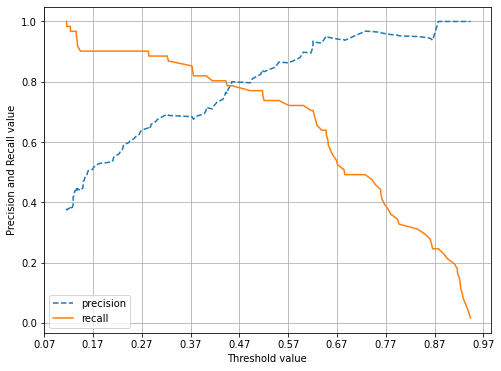

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticher
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 treshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시.
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    #threshold 값 X 축의 Scale을 0.1 단위로 변경.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, Y축 label과 legend, 그리고 grid 설정.
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, Ir_clf.predict_proba(X_test)[:, 1])

정밀도는 점선, 재현율은 실선으로 표현했다.  
임곗값이 낮을수록 많은 양성 예측으로 인해 재현율 값이 높아지고 정밀도 값이 극도로 낮아진다.  


## 정밀도와 재현율의 맹점
Postive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다.  
  
즉, 업무 환경에 따라 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 한다.  
  
  ### 정밀도가 100%가 되는 방법
  확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다.  
    
  정밀도 = $TP\over (FP + TP)$ 이다. 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 
    
  이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1이 되므로  
    
  정밀도는 $1\over (1+0)$으로 100%가 된다.  
    
  ### 재현율이 100%가 되는 방법  
  모든 환자를 Positive로 예측하면 된다.  
    
   재현율 = $TP\over (TP + FN)$이므로 전체 환자를 1000명을 다 Positive로 예측하는 것이다.  
     
   이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고  
     
   FN은 아예 0이므로 $30\over (30 + 0)$이 된다.  
     
       
   

# F1 스코어  
F1 스코어(score)는 정밀도와 재현율을 결합한 지표다.  
  
이는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.  
  
공식은 다음과 같다.
  
## F1 = 2*$precision * recall\over precision + recall $ = $2\over{1 \over recall} + {1 \over precision} $   
  
  
사이킷런은 F1 스코어를 구하기 위해 f1_score()라는 API를 제공한다.  
  
이를 이용해 정밀도, 재현율 절의 예제에서 학습/예측한 로지스틱 회귀 기반 타이타닉 생존자 모델의 F1 스코어를 구해 보겠다.

In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7966


다음으로 타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표를 구해 보겠다.  
  
이를 위해 앞서 작성한 get_clf_cvall() 함수에 F1 스코어를 구하는 로직을 추가하겠다.  


In [19]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    
    # f1 score print 추가
    print('정확도 : {0:.4f}, 정밀도 : {0:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
          
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = Ir_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), threshold)

NameError: name 'threshold' is not defined

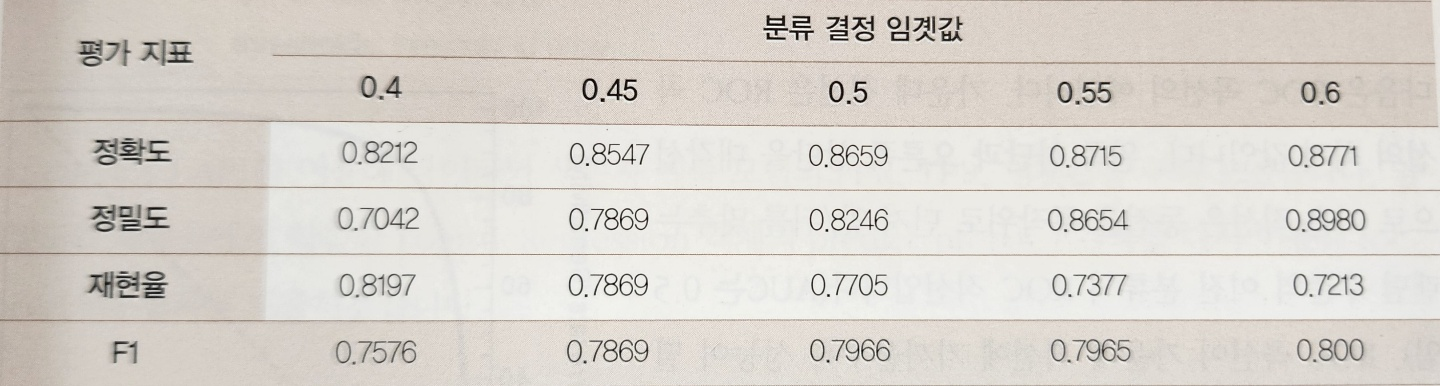

# ROC 곡선과 AUC
ROC 곡선(Reciver Operation Characteristic Curve)은 일반적으로 의학 분야에 많이 사용되지만, 머신러닝의 이진 분류 모델의 예측 성능을 
  
판단하는 중요한 평가 지표이기도 하다.  
  
FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 보여주는 곡선이다.  
  
FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.  
  
                                                                                                  --

- TPR(재현율, 민감도) = $TP\over (FN + TP) $  
  
실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타낸다. ex) 질병 양성 판정  
  
                                                                                                --
- TNR(특이성) = $TN\over (FP + TN) $ = 1 - TNR = 1 - 특이성 
  
실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타낸다. ex)질병 음성 판정  
  
                                                                                                  --  

사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공한다.  
  
사용법은 precision_recall_curve() API와 유사하다.  
  
  
    
다음은 roc_curve()의 주요 입력 파라미터와 반환 값을 기술한 것이다.  
  
- 입력 파라미터  
 y_true : 실제 클래스 값 array ( array shape = [데이터 건수])  
 y_score : predict_proba()의 반환 값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨. array.  
 shape = [n_samples]  
   
                                                                                                
- 반환 값  
 fpr = fpr 값을 array로 반환  
 tpr = tpr 값을 array로 반환  
 thresholds : threshold 값 array  
  
                                                                                                  --
roc_curve() API를 이용해 타이타닉 생존아 예측 모델의 FPR, TPR, 임곗값을 구해 보겠다.

In [24]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = Ir_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출.
#threshold[0]은 max(예측확률)+1로 임의 설정됨, 이를 제외하기 위해 np.arange는 1부터 시작
thr_index= np.arange(1, threshold.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index :', thr_index)
print('샘플 index로 추출한 임곗값 :', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index : [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값 : [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR :  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR :  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화해 보겠다.

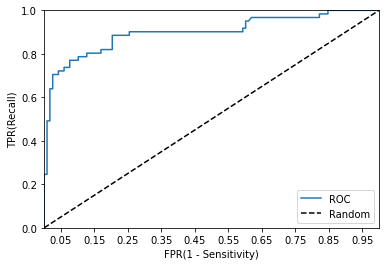

In [25]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음.
    fprs, tprs, threshold = roc_curve(y_test, pred_proba_c1)
    
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    
    #가운데 대각선 직선을 그림.
    plt.plot([0, 1],[0, 1], 'k--', label='Random')
    
    #FPR X 축의 Scale을 0.1 단위로 벼녕, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1);plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은  
  
ROC 곡선 면적에 기반한 AUC 값으로 결정한다.

AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치다.  

In [27]:
from sklearn.metrics import roc_auc_score

pred_proba = Ir_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.8987


마지막으로 get_clf_eval() 함수에 roc_auc_score()를 이용해 ROC AUC 값을 측정하는 로직을 추가하는데,  
  
ROC AUC는 예측 확률값을 기반으로 계산되므로 이를 geT_clf_eval() 함수의 인자로 받을 수 있도록  
  
get_clf_eval(y_test, pred=None, pred_proba=None)로 함수형을 변경해 준다.  

In [29]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confution = confution_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_tset, pred_proba)
    print('오차 행렬')
    print(confution)
    
    #ROC-AUC print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:4.f}, F1 = {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, foc_auc))

-----------------------------------------------------------------------
# 피마 인디언 당뇨병 예측

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [79]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [81]:
# 피처 데이트 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Ountcoome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출.
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
Ir_clf = LogisticRegression(solver='linear')
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
pred_proba = Ir_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)
# p.175

ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got linear.

In [58]:
pred_proba_c1 = Ir_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

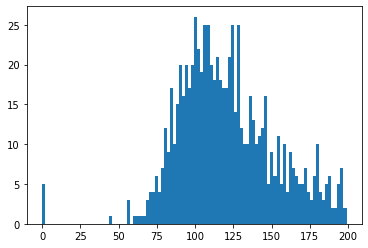

In [59]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [66]:
# 0 값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [69]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_feafures].replace(0, mean_zero_features)

NameError: name 'zero_feafures' is not defined

In [71]:
X = diabetes_data.iloc[:, : -1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
Ir_clf = LogisticRegression()
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predcit_proba(X_test)
pred_proba = Ir_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

AttributeError: 'LogisticRegression' object has no attribute 'predcit_proba'

In [73]:
threshold = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = Ir_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), threshold)

임곗값 :  1.943262794352988


NameError: name 'confution_matrix' is not defined

In [74]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 Ir_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

NameError: name 'confution_matrix' is not defined